<a href="https://colab.research.google.com/github/yishiuan20/Food-Waste-Modeling/blob/main/Food_Model_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Algorithm**


In [1]:
# General:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import gdown
import io

# For ML:
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# **Load Datas**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/Main Lunch Data - final-3.csv'
data = pd.read_csv(path)
print(data)


           Date  Popularity mean Popularity  \
0     12/3/2024         0.1             0,1   
1    12/16/2024         0.3     0.174285714   
2    12/16/2024         0.4     0.174285714   
3    12/16/2024         0.0     0.174285714   
4    12/16/2024         0.4     0.174285714   
..          ...         ...             ...   
156   1/16/2025         0.0            0.22   
157   1/16/2025         0.3            0.22   
158   1/17/2025         0.0           0.033   
159   1/17/2025         0.0           0.033   
160   1/17/2025         0.1           0.033   

    Specify which items/ingredients you threw away. Separate each item with a comma. (e.x. whole apple, pizza crust, diced tomato in pasta, none)  \
0                                          Dinner roll                                                                                              
1    Sometimes the fruit/vegetable, part of meat wi...                                                                                   

# **Data Spliting**

In [4]:
print(data.columns.tolist())

['Date', 'Popularity', 'mean Popularity', 'Specify which items/ingredients you threw away. Separate each item with a comma. (e.x. whole apple, pizza crust, diced tomato in pasta, none)', 'Menu Item', 'Side', 'beef', 'tomato', 'pasta', 'salad', 'bread', 'vegan meat', 'potatoes', 'chicken', 'beans', 'corn', 'gravy', 'broccoli', 'cheese', 'rice', 'carrots', 'celery', 'fish', 'tofu', 'peas', 'eggs', 'grapes', 'strawberries', 'pineapple', 'mushroom', 'spinach', 'peppers', 'quinoa']


In [5]:
X = data[['beef', 'tomato', 'pasta', 'salad', 'bread', 'vegan meat', 'potatoes', 'chicken', 'beans', 'corn', 'gravy', 'broccoli', 'cheese', 'rice', 'carrots', 'celery', 'fish', 'tofu', 'peas', 'eggs', 'grapes', 'strawberries', 'pineapple', 'mushroom', 'spinach', 'peppers', 'quinoa']]
y= data[['mean Popularity']]

y=y.values.ravel()
print(y)
print(X)

['0,1' '0.174285714' '0.174285714' '0.174285714' '0.174285714'
 '0.174285714' '0.174285714' '0.174285714' '0.174285714' '0.174285714'
 '0.174285714' '0.174285714' '0.174285714' '0.174285714' '0.174285714'
 '0.174285714' '0.174285714' '0.174285714' '0.174285714' '0.174285714'
 '0.174285714' '0.174285714' '0.174285714' '0.174285714' '0.174285714'
 '0.174285714' '0.174285714' '0.174285714' '0.174285714' '0.174285714'
 '0.174285714' '0.174285714' '0.174285714' '0.174285714' '0.174285714'
 '0.174285714' '0.3' '0.3' '0.3' '0.3' '0.3' '0.3' '0.3' '0.3' '0.3' '0.3'
 '0.3' '0.3' '0.3' '0.3' '0.3' '0.3' '0.3' '0.3' '0.09375' '0.09375'
 '0.09375' '0.09375' '0.09375' '0.09375' '0.09375' '0.09375' '0.09375'
 '0.09375' '0.09375' '0.09375' '0.09375' '0.09375' '0.09375' '0.09375'
 '0.15' '0.15' '0.15' '0.15' '0.15' '0.15' '0.15' '0.15' '0.15' '0.15'
 '0.15' '0.15' '0.15' '0.15' '0.2' '0.133333333' '0.133333333'
 '0.133333333' '0.133333333' '0.133333333' '0.133333333' '0.257894737'
 '0.257894737' '0.25

### Random Forest Model

### Training the Model

In [12]:
# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# Train logistic regression model
model = LinearRegression()


#calculate and print score

model.fit(X_train, y_train) # Use transformed y_train for training
model_score= model.score(X_test, y_test) # Use transformed y_test for scoring
print(model_score)


1.0


In [13]:
#Predict
y_model_train_pred = model.predict(X_train)
y_model_test_pred = model.predict(X_test)
print(y_model_test_pred)
print(y)

[0.17428571 0.25789474 0.17428571 0.11428571 0.22       0.25555556
 0.09375    0.3        0.25789474 0.13333333 0.13333333 0.15
 0.25789474 0.11428571 0.09375    0.17428571 0.3        0.22
 0.09375    0.13333333 0.17428571 0.15       0.11428571 0.25
 0.17428571 0.09375    0.17428571 0.11428571 0.3        0.2875
 0.09375    0.11428571 0.17428571]
[0.1        0.17428571 0.17428571 0.17428571 0.17428571 0.17428571
 0.17428571 0.17428571 0.17428571 0.17428571 0.17428571 0.17428571
 0.17428571 0.17428571 0.17428571 0.17428571 0.17428571 0.17428571
 0.17428571 0.17428571 0.17428571 0.17428571 0.17428571 0.17428571
 0.17428571 0.17428571 0.17428571 0.17428571 0.17428571 0.17428571
 0.17428571 0.17428571 0.17428571 0.17428571 0.17428571 0.17428571
 0.3        0.3        0.3        0.3        0.3        0.3
 0.3        0.3        0.3        0.3        0.3        0.3
 0.3        0.3        0.3        0.3        0.3        0.3
 0.09375    0.09375    0.09375    0.09375    0.09375    0.09375
 0.093

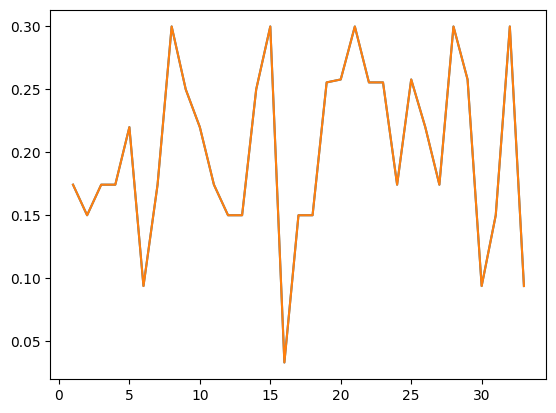

In [9]:
x_axis = list(range(1,34))
plt.plot(x_axis,y_model_test_pred)
plt.plot(x_axis,y_test)
plt.show()

In [10]:
print(X_train, y_train)

     beef  tomato  pasta  salad  bread  vegan meat  potatoes  chicken  beans  \
59      1       1      1      1      1           0         0        0      0   
9       0       0      0      0      0           1         1        0      0   
13      0       0      0      0      0           1         1        0      0   
95      0       1      0      0      1           0         0        1      1   
10      0       0      0      0      0           1         1        0      0   
..    ...     ...    ...    ...    ...         ...       ...      ...    ...   
32      0       0      0      0      0           1         1        0      0   
125     0       0      0      0      1           0         1        1      0   
41      0       0      0      0      1           0         0        1      1   
133     0       0      0      0      0           0         0        0      1   
63      1       1      1      1      1           0         0        0      0   

     corn  ...  tofu  peas  eggs  grape

# **Pickling Model**

In [16]:
import pickle as pkl
food_model = open('model.pkl', 'wb')
pkl.dump(model, food_model)
food_model.close()